In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_losses = pd.read_csv('D:\\Bootcamp\\9. Data Wrangling\\Automobile\\automobile-losses.csv')

In [3]:
data_risk = pd.read_csv('D:\\Bootcamp\\9. Data Wrangling\\Automobile\\automobile-risk.csv')

In [4]:
data_spec = pd.read_csv('D:\\Bootcamp\\9. Data Wrangling\\Automobile\\automobile-spec.csv')

In [5]:
data_losses.head(10)

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0
5,6,NaN
6,7,158.0
7,8,NaN
8,9,158.0
9,10,NaN


In [6]:
data_risk.head(10)

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2
5,6,2
6,7,1
7,8,1
8,9,1
9,10,0


In [7]:
data_spec.shape

(205, 25)

In [8]:
data_spec.head(10)

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,6,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,7,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,8,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,9,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,10,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [9]:
data_spec.columns

Index(['ID', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheel', 'engine-loc', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'cylinder', 'engine-size', 'fuel-system',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [10]:
data_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

In [11]:
data_spec.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         1
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

## Part 1

### 1. Join 3 tables using ID as key

In [12]:
data = pd.merge(data_losses, data_risk, how='outer')
data = pd.merge(data_spec, data, how='outer')
data.head(10)

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2
5,6,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,NaN,2
6,7,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,158.0,1
7,8,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,NaN,1
8,9,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,158.0,1
9,10,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,NaN,0


### 2. Quick-look (dimension, data type, head/tail, summary statistics, etc)

In [13]:
#Dimension
data.shape #ada 205 rows dan 27 columns

(205, 27)

In [14]:
data.ndim # 2 dimension

2

In [15]:
#Data Types
data.dtypes

ID                     int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheel           object
engine-loc            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
cylinder              object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
normalized-losses    float64
symboling              int64
dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

In [17]:
data.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2


In [18]:
data.tail()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
200,201,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,95.0,-1
201,202,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,95.0,-1
202,203,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,95.0,-1
203,204,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,95.0,-1
204,205,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0,95.0,-1


In [19]:
data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

### 3. Identify missing value. If any, how will you handle it?

In [20]:
count_missing = data.isnull().sum()
count_missing

ID                    0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
normalized-losses    41
symboling             0
dtype: int64

In [21]:
percentage = round(count_missing/len(count_missing)*100,2)
percentage

ID                     0.00
make                   0.00
fuel-type              0.00
aspiration             0.00
num-of-doors           3.70
body-style             0.00
drive-wheel            0.00
engine-loc             0.00
wheel-base             0.00
length                 0.00
width                  0.00
height                 0.00
curb-weight            0.00
engine-type            0.00
cylinder               0.00
engine-size            0.00
fuel-system            0.00
bore                  14.81
stroke                14.81
compression-ratio      0.00
horsepower             7.41
peak-rpm               7.41
city-mpg               0.00
highway-mpg            0.00
price                 14.81
normalized-losses    151.85
symboling              0.00
dtype: float64

ada 7 kolom yang beberapa datanya missing. yang saya lakukan:
1. di kolom normalized-losses saya drop kolomnya karena nilai yang kosong sangat banyak
2. data yang hilang di kolom 'num-of-doors' saya drop
3. data yang missing di bore, stroke, horsepower, peak-rpm saya isi dengan median dari data tsb
4. data yang missing di price dan num-of-doors saya drop

In [22]:
data = data.drop(columns='normalized-losses')

In [23]:
data['num-of-doors'].head()

0     two
1     two
2     two
3    four
4    four
Name: num-of-doors, dtype: object

In [24]:
bore_median = data['bore'].median()
stroke_median = data['stroke'].median()
horsepower_median = data['horsepower'].median()
peak_median = data['peak-rpm'].median()

In [25]:
data = data.fillna({
    'bore':bore_median,
    'stroke':stroke_median,
    'horsepower':horsepower_median,
    'peak-rpm':peak_median
})

In [26]:
data.shape

(205, 26)

In [27]:
data = data.dropna()

In [28]:
data.shape

(200, 26)

In [29]:
data.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
symboling            0
dtype: int64

## 5. Perform visualization using at least 5 difference visualization technique (barplot, scatter plot, area, boxplot, pie chart, line chart, etc)

### Univariate Analysis

In [30]:
data.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


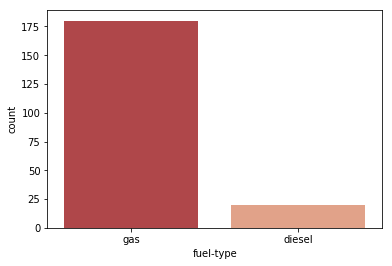

In [31]:
sns.set_palette("RdGy")
sns.countplot(data['fuel-type'])

Dapat dilihat bahwa bahan bakar mobil yang paling banyak digunakan adalah GAS

In [32]:
num_doors = data.groupby('num-of-doors').ID.count().reset_index()
num_doors = num_doors.drop([0])
num_doors = num_doors.rename(columns=
    {'ID':'Count'}
)
num_doors

,num-of-doors,Count
1,four,113
2,two,86


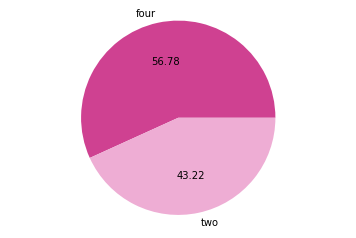

In [33]:
sns.set_palette("PiYG")
plt.pie(num_doors['Count'], labels=num_doors['num-of-doors'], autopct='%.2f')
plt.axis('equal')
plt.show()

jumlah pintu empat masih mendominasi namun selisihnya dengan jumlah pintu 2 tidak terlalu signifikan

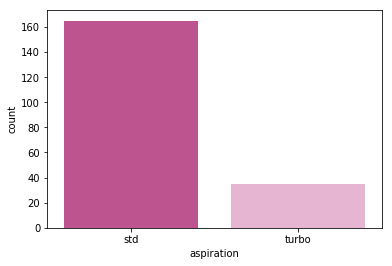

In [34]:
sns.countplot(data['aspiration'])

Jumlah mobil yang memiliki aspiration std jauh lebih banyak daripada yang turbo

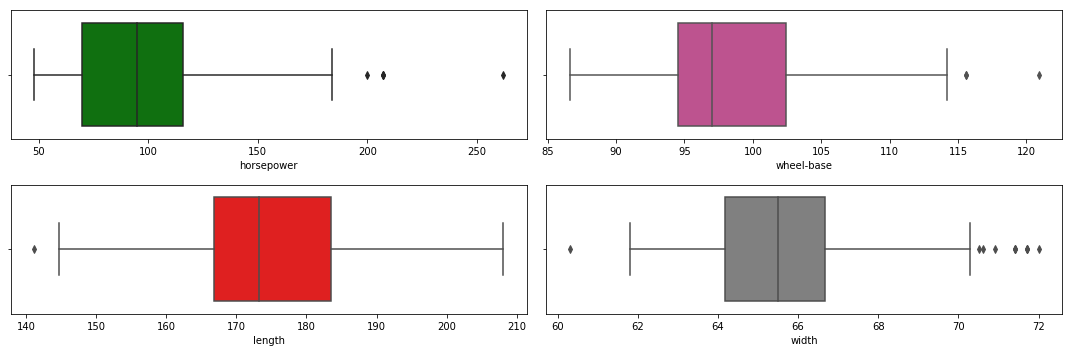

In [35]:
f = plt.figure(figsize=(15,5))
f.add_subplot(2,2,1)
sns.boxplot(data['horsepower'], color='green')

f.add_subplot(2,2,2)
sns.boxplot(data['wheel-base'])

f.add_subplot(2,2,3)
sns.boxplot(data['length'], color='red')

f.add_subplot(2,2,4)
sns.boxplot(data['width'], color='gray')

f.tight_layout()

dari keempat variabel ternyata rata2 nilai outliernya masih rendah

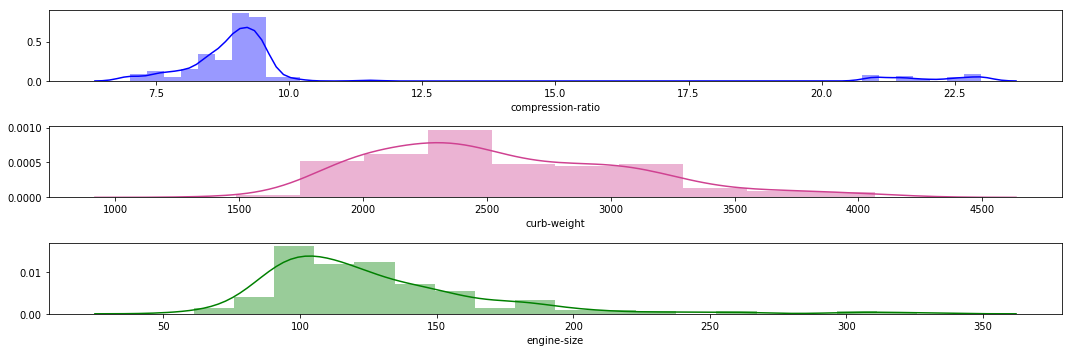

In [36]:
g = plt.figure(figsize=(15,5))
g.add_subplot(3,1,1)
sns.distplot(data['compression-ratio'], kde=True, color='blue')

g.add_subplot(3,1,2)
sns.distplot(data['curb-weight'])

g.add_subplot(3,1,3)
sns.distplot(data['engine-size'], kde=True, color='green')

g.tight_layout()

1. untuk compression-ratio sebagian besar distribusi data masih berada di antara nilai 7.5 - 10 (Right Skew)
2. untuk curb-weight sebagian besar distribusi data masih berada di antara nilai 2000 - 3500 (Symmetric)
3. untuk engine-size sebagian besar distribusi data masih berada di antara nilai 75 - 160 (Right Skew)

Top 3 top car makers are Toyota, Mazda and Nissan

### Bivariate Analysis

In [ ]:
data.corr().style.background_gradient().set_precision(2)
#mencari korelasi antar variabel

hubungan yang ingin dicari
1. price - engine-size
2. price - horsepower
3. price - highway-mpg
4. length - horsepower
5. engine size - height

In [ ]:
sns.regplot(data=data2, x='engine-size', y='price')

dapat dilihat bahwa ada korelasi positif antara harga mobil dengan ukuran mesin. semakin besar ukuran mesin maka semakin mahal harga mobil

In [ ]:
plot = sns.barplot(data=data2, x='highway-mpg', y='price')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

ternyata highway-mpg dan price memiliki korelasi yang negatif yaitu semakin besar highway-mpg maka semakin murah juga harganya

In [ ]:
sns.regplot(data=data2, x='horsepower', y='price')

korelasi positif terjadi antara horsepower dengan price dimana dengan bertambhanya horsepower maka price mobil akan semakin naik

## Part 2

### 1. Car brand with highest price

In [ ]:
data2.nlargest(1, 'price')

Car brand with the highst price is Mercedes-Benz with the price 45400. the details is above

### 2. Maximum horsepower for car with 6 cylinder engine

In [ ]:
data2[data2['cylinder']=='six'].nlargest(5, 'horsepower')

the maximum of horsepower with 6 cylinder is 207 with porsche as the makers

### 3. Average peak-rpm for ‘turbo’ style aspiration car

In [ ]:
data2[data2['aspiration']=='turbo']['peak-rpm'].mean()

In [ ]:
data2.groupby('aspiration')['peak-rpm'].mean()

jadi untuk Average peak-rpm for ‘turbo’ style aspiration car adalah 4907

### 4. Average price based on body-style

In [ ]:
data2.groupby('body-style').price.mean()

rata rata garga berdasarkan style dari body mobil dapat dilihat diatas

### 5. Average price based on body-style only for Honda car (make=Honda)

In [ ]:
data2_honda = data2[data2['make']=='honda']

In [ ]:
data2_honda.groupby('body-style').price.mean()

rata rata khusus untuk mobil honda berdasarkan style dari mobilnya bisa dilihat diatas

# Clustering

# Clustering

# Clustering

# Clustering

# Clustering
Setelah melakukan EDA, maka akan dilakukan clustering untuk menjawab beberapa pertanyaan berikut ini:
1. Berapa cluster yang dibuat ? feature apa saja yang digunakan ?
2. Manakah algoritma clustering yang anda ambil ? kenapa ?
3. Apakah setiap cluster memiliki ciri - ciri yang berbeda ? apa saja ciri-ciri cluster tersebut ?

In [39]:
data.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [40]:
#Beberapa kolom yang akan saya drop karena kemungkinan besar tidak akan saya gunakan
dropped = ['make', 'num-of-doors', 'body-style', 'drive-wheel', 'engine-loc', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'symboling']
data.drop(columns=dropped, inplace=True)
data.head()

,ID,fuel-type,aspiration,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,gas,std,88.6,168.8,64.1,48.8,2548,dohc,four,130,111.0,5000.0,21,27,13495.0
1,2,gas,std,88.6,168.8,64.1,48.8,2548,dohc,four,130,111.0,5000.0,21,27,16500.0
2,3,gas,std,94.5,171.2,65.5,52.4,2823,ohcv,six,152,154.0,5000.0,19,26,16500.0
3,4,gas,std,99.8,176.6,66.2,54.3,2337,ohc,four,109,102.0,5500.0,24,30,13950.0
4,5,gas,std,99.4,176.6,66.4,54.3,2824,ohc,five,136,115.0,5500.0,18,22,17450.0


In [43]:
data.drop(columns=['ID'], inplace=True)

In [44]:
data.head()

,fuel-type,aspiration,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,gas,std,88.6,168.8,64.1,48.8,2548,dohc,four,130,111.0,5000.0,21,27,13495.0
1,gas,std,88.6,168.8,64.1,48.8,2548,dohc,four,130,111.0,5000.0,21,27,16500.0
2,gas,std,94.5,171.2,65.5,52.4,2823,ohcv,six,152,154.0,5000.0,19,26,16500.0
3,gas,std,99.8,176.6,66.2,54.3,2337,ohc,four,109,102.0,5500.0,24,30,13950.0
4,gas,std,99.4,176.6,66.4,54.3,2824,ohc,five,136,115.0,5500.0,18,22,17450.0


### Mencari hubungan antar features

In [47]:
data.corr().style.background_gradient()

,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1,0.875931,0.813774,0.588802,0.781483,0.570798,0.37267,-0.358787,-0.47226,-0.544711,0.583709
length,0.875931,1,0.856496,0.4875,0.881076,0.684304,0.581197,-0.281584,-0.669687,-0.702181,0.690459
width,0.813774,0.856496,1,0.301557,0.865911,0.728658,0.615502,-0.242276,-0.636083,-0.682853,0.750854
height,0.588802,0.4875,0.301557,1,0.304661,0.0705587,-0.0866715,-0.307109,-0.0512134,-0.105916,0.132354
curb-weight,0.781483,0.881076,0.865911,0.304661,1,0.848699,0.758787,-0.277392,-0.751195,-0.796261,0.834101
engine-size,0.570798,0.684304,0.728658,0.0705587,0.848699,1,0.823046,-0.254432,-0.652034,-0.680767,0.8721
horsepower,0.37267,0.581197,0.615502,-0.0866715,0.758787,0.823046,1,0.107769,-0.821275,-0.804531,0.811097
peak-rpm,-0.358787,-0.281584,-0.242276,-0.307109,-0.277392,-0.254432,0.107769,1,-0.115384,-0.058208,-0.100211
city-mpg,-0.47226,-0.669687,-0.636083,-0.0512134,-0.751195,-0.652034,-0.821275,-0.115384,1,0.972058,-0.68776
highway-mpg,-0.544711,-0.702181,-0.682853,-0.105916,-0.796261,-0.680767,-0.804531,-0.058208,0.972058,1,-0.705613


Berdasarkan data korelasi diatas, saya memutuskan untuk mengambil 2 features untuk saya clustering karena 2 features ini memiliki korelasi positif yang cukup kuat yaitu:
1. price
2. horsepower

In [52]:
data_kluster = data[['price', 'horsepower']]
data_kluster.head()

,price,horsepower
0,13495.0,111.0
1,16500.0,111.0
2,16500.0,154.0
3,13950.0,102.0
4,17450.0,115.0


## Melihat korelasi 2 features

In [53]:
#Mengubah data menjadi array
X = np.asarray(data_kluster)

Text(0.5,1,'Regression Line')

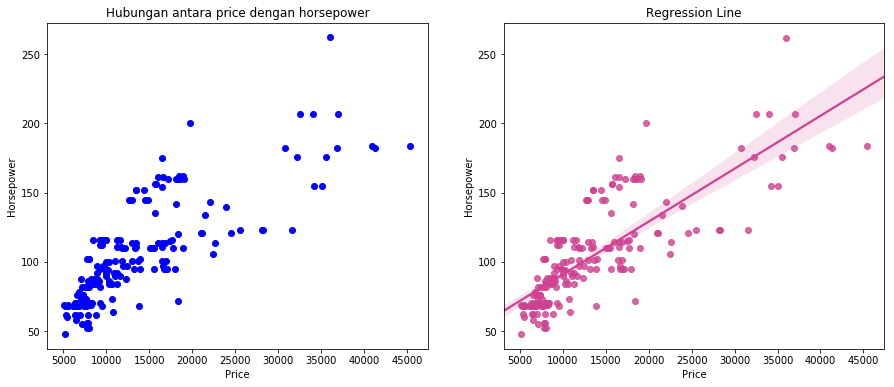

In [184]:
#Plotting data di scatter plot
f = plt.figure(figsize=(15,6))

f.add_subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c='b')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('Hubungan antara price dengan horsepower')

f.add_subplot(1,2,2)
sns.regplot(x=X[:,0], y=X[:,1])
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('Regression Line')

## Algoritma Pertama Menggunakan K-Means

In [62]:
#Mencari nilai K yang optimal
inertia = []
sil = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    km.labels_
    
    inertia.append(km.inertia_)
    sil.append(silhouette_score(X, km.labels_))

Text(0,0.5,'Silhoutte Score')

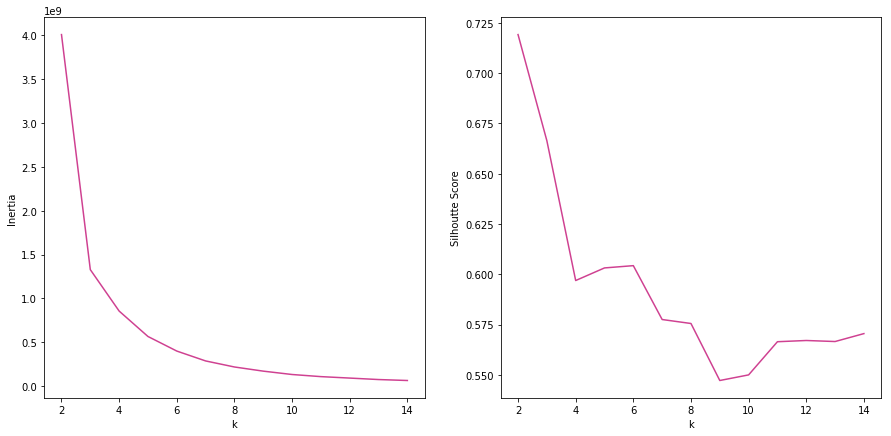

In [64]:
#Plotting dengan menggunakan inertia dan silhoute score

f = plt.figure(figsize=(15,7))

f.add_subplot(1,2,1)
plt.plot(K, inertia)
plt.xlabel('k')
plt.ylabel('Inertia')

f.add_subplot(1,2,2)           
plt.plot(K, sil)
plt.xlabel('k')
plt.ylabel('Silhoutte Score')

### Dari kedua score diatas, saya memutuskan untuk menggunakan K=2

In [65]:
km = KMeans(n_clusters=2)
km = km.fit(X)

In [66]:
km.cluster_centers_

array([[10751.12571429,    95.50285714],
       [30585.12      ,   158.04      ]])

Text(0.5,1,'Letak Centroid')

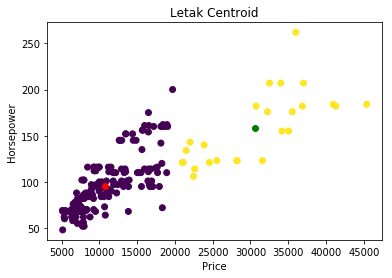

In [185]:
#Plotting centroid
plt.scatter(X[:,0], X[:,1], c=km.labels_)
plt.scatter(10751.12571429, 95.50285714, c='r')
plt.scatter(30585.12, 158.04, c='g')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('Letak Centroid')

In [68]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1])

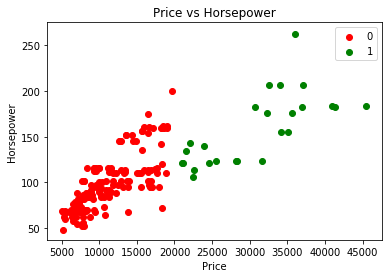

In [186]:
#Visualisasi hasil clustering
x = X[:,0]
y = X[:,1]

group = km.labels_

colors = ['red', 'green']
fig, ax = plt.subplots()

for g in set(km.labels_):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, c=colors[g], label=g)
    plt.xlabel('Price')
    plt.ylabel('Horsepower')
    plt.title('Price vs Horsepower')

ax.legend()
plt.show()

- Dari metode K-Means didapatkan bahwa terdapat 2 kluster yang berwarna merah dan hijau

## Algoritma kedua menggunakan Hierarchical Clustering

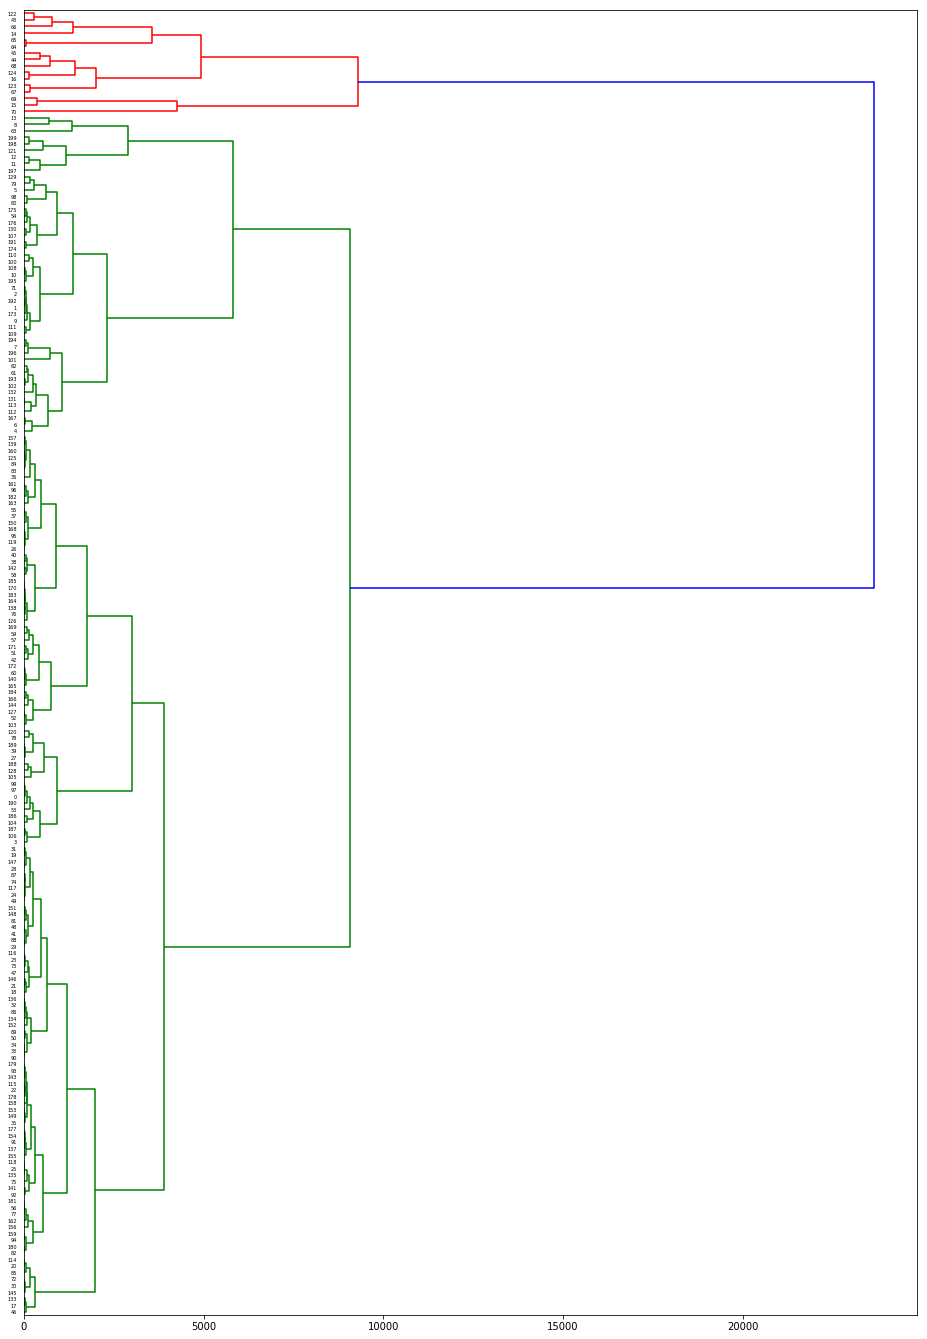

In [83]:
plt.figure(figsize=(16,24))
dendogram = sch.dendrogram(sch.linkage(X, method='average'), orientation='right')

- Dari dendogram, dapat diambil kesimpulan bahwa terdapat 2 kluster

### Mencari Metode Linkage yang paling optimal

In [82]:
features = ['complete', 'ward', 'average']
for feature in features:
    hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=feature)
    hc.fit(X)
    labels = hc.labels_
    print(f'Linkage {feature} mempunyai score {silhouette_score(X, labels)}')

Linkage complete mempunyai score 0.7517018318823813
Linkage ward mempunyai score 0.7478967404471697
Linkage average mempunyai score 0.7517018318823813


- Karena nilai linkage complete dan average sama, saya memutuskan untuk menggunakan linkage yang Average

In [85]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
hc.fit(X)
labels = hc.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

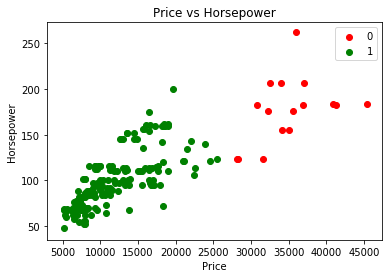

In [187]:
#Vosualisasi untuk clustering
x = X[:,0]
y = X[:,1]

group = hc.labels_

colors = ['red', 'green']
fig, ax = plt.subplots()

for g in set(hc.labels_):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, c=colors[g], label=g)
    plt.xlabel('Price')
    plt.ylabel('Horsepower')
    plt.title('Price vs Horsepower')
ax.legend()
plt.show()

- Dari metode Hierarchical Clustering didapatkan bahwa terdapat 2 kluster yang berwarna merah dan hijau

## Algoritma 3 Menggunakan DBSCAN

In [188]:
#Mencari nilai yan optimal untuk eps dan min_samples
eps_values = range(2000,3000,200)
min_samples = (5,100,5)
sc = 999999

for eps in eps_values:
    for samples in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=samples)
        dbscan.fit(X)
        label = dbscan.labels_
        if sc > err:
            sc = err
print(f'eps paling max adalah {eps}, dengan jumlah sample {samples}. Nilai silhoutte nya {sc}')

eps paling max adalah 2800, dengan jumlah sample 5. Nilai silhoutte nya 0.7020044340321815


In [160]:
dbscan = DBSCAN(eps=2800, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=2800, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [161]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

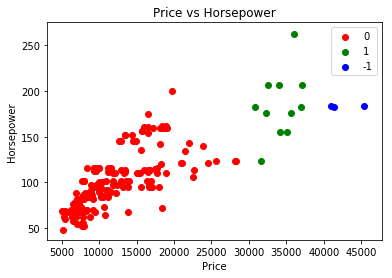

In [189]:
#Vosualisasi untuk clustering
x = X[:,0]
y = X[:,1]

group = dbscan.labels_

colors = ['red', 'green', 'blue']
fig, ax = plt.subplots()

for g in set(dbscan.labels_):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, c=colors[g], label=g)
    plt.xlabel('Price')
    plt.ylabel('Horsepower')
    plt.title('Price vs Horsepower')
ax.legend()
plt.show()

- Berdasarkan DBSCAN Clistering didapatkan 3 cluster dengan satu cluster berupa noise

# Kesimpulan

Text(0.5,1,'DBSCAN Cluster')

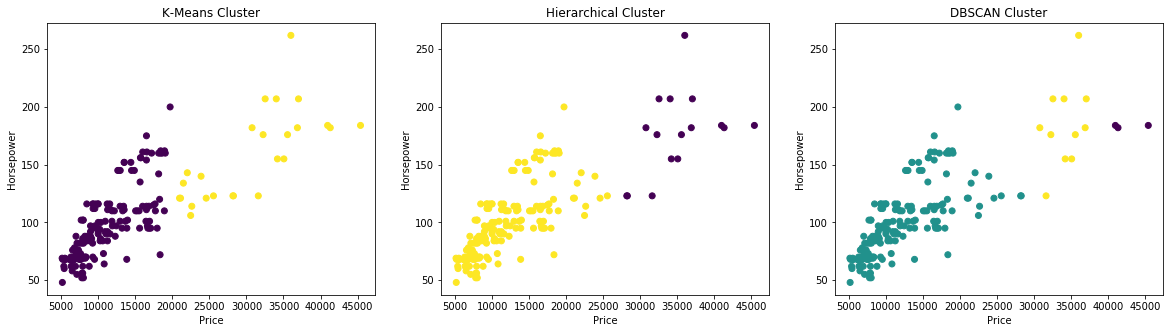

In [178]:
#Visualisasi 3 Metode
f = plt.figure(figsize=(20,5))

f.add_subplot(1,3,1)
x = X[:,0]
y = X[:,1]
plt.scatter(x, y, c=km.labels_)
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('K-Means Cluster')

f.add_subplot(1,3,2)
x = X[:,0]
y = X[:,1]
plt.scatter(x, y, c=hc.labels_)
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('Hierarchical Cluster')

f.add_subplot(1,3,3)
x = X[:,0]
y = X[:,1]
plt.scatter(x, y, c=dbscan.labels_)
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('DBSCAN Cluster')

## Algoritma yang dipilih : Hierarchical Clustering

Jawaban:
1. Cluster yang saya buat adalah <b>2</b>, dengan feature yang saya gunakan adalah <b>Horsepower</b> dan <b>Price</b>
2. ALgoritma yang saya ambil adalah <b>Hierarchical Clustering</b> karena:
    1. Algoritma ini memberikan nilai <b>silhoutte score</b> yang paling baik yaitu sebesar <b>0.75</b>, untuk K-Means sebesar <b>0.72</b>, dan <b>DBSCAN 0.7</b>.
    2. Dari sisi <b>visual</b>, terlihat bahwa terdapat <b>gap</b> yang jelas antara cluster 1 dengan cluster 2
3. Ya, setiap cluster memiliki ciri-ciri yang berbeda. Ciri-ciri masing cluster adalah:
    1. Cluster 0 (warna merah): Memiliki ciri ciri harga mobilnya itu <b>diatas</b> sekitar 27000 dan memiliki horsepower dengan range sekitar 100-250
    2. Cluster 1 (warna hijau): Memiliki ciri ciri harga mobilnya itu <b>dibawah</b> sekitar 27000 dan memiliki horsepower dengan range sekitar 50-200